# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Khoirotun Hisan]
- **Email:** [mc299d5x0922@student.devacademy.id]
- **ID Dicoding:** [khoesan]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day[1].csv to day[1].csv


In [3]:
import pandas as pd
import numpy as np
import datetime

!pip install plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv("day[1].csv", parse_dates=["dteday"])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berhasil di-load, tidak ada error saat membaca file.
- Data memiliki struktur yang jelas, dengan tanggal sebagai referensi waktu utama.

### Assessing Data

In [5]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
df.info()
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
print("Jumlah missing values per kolom:\n", df.isnull().sum())
df.describe()
kategori_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in kategori_cols:
    print(f"Nilai unik dalam {col}: {df[col].unique()}")

Jumlah baris: 731, Jumlah kolom: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64     

**Insight:**
- Dataset tidak memiliki missing values dan tidak ada duplikasi data.
- Dataset sudah cukup bersih dari segi kelengkapan.
- Beberapa kolom kategori (season, weathersit, dll.) masih dalam bentuk angka, sehingga perlu diubah ke label yang lebih mudah dibaca.

### Cleaning Data

In [6]:
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
               4: "Thursday", 5: "Friday", 6: "Saturday"}
weathersit_map = {1: "Clear", 2: "Cloudy", 3: "Light Rain"}

df['season'] = df['season'].map(season_map)
df['weekday'] = df['weekday'].map(weekday_map)
df['weathersit'] = df['weathersit'].map(weathersit_map)

df['yr'] = df['yr'].map({0: 2011, 1: 2012})

df['cnt_check'] = df['casual'] + df['registered']
df['is_correct'] = df['cnt'] == df['cnt_check']

incorrect_rows = df[df['is_correct'] == False]
if not incorrect_rows.empty:
    print("Data tidak sesuai antara cnt dan casual + registered:")
    print(incorrect_rows[['dteday', 'casual', 'registered', 'cnt', 'cnt_check']])

df.drop(columns=['cnt_check', 'is_correct'], inplace=True)

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outlier ditemukan pada kolom {col}:")
        print(outliers[['dteday', col]])

df.to_csv("bike_sharing_cleaned.csv", index=False)
print("✅ Data cleaning selesai! File telah disimpan.")

Outlier ditemukan pada kolom hum:
       dteday       hum
49 2011-02-19  0.187917
68 2011-03-10  0.000000
Outlier ditemukan pada kolom windspeed:
        dteday  windspeed
44  2011-02-14   0.417908
49  2011-02-19   0.507463
93  2011-04-04   0.385571
94  2011-04-05   0.388067
292 2011-10-20   0.422275
382 2012-01-18   0.415429
407 2012-02-12   0.409212
420 2012-02-25   0.421642
432 2012-03-08   0.441563
433 2012-03-09   0.414800
450 2012-03-26   0.386821
666 2012-10-28   0.398008
721 2012-12-22   0.407346
✅ Data cleaning selesai! File telah disimpan.


**Insight:**
- Nilai 0.000000 kemungkinan besar adalah data error atau kesalahan pencatatan.
- Nilai 0.187917 masih berada dalam batas yang mungkin terjadi, tetapi bisa ditinjau lebih lanjut apakah ini kondisi ekstrem atau kesalahan data.
- Ditemukan 13 outlier pada kecepatan angin dengan nilai antara 0.385 - 0.507. Nilai-nilai ini menunjukkan hari-hari dengan kecepatan angin yang sangat tinggi dibandingkan hari lainnya.
Bisa jadi ini adalah hari dengan cuaca buruk seperti badai atau angin kencang.

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
season_rentals = df.groupby("season")["cnt"].agg(["mean", "sum"]).reset_index()
season_rentals.columns = ["season", "avg_rentals", "total_rentals"]

print(season_rentals)

weather_rentals = df.groupby("weathersit")["cnt"].agg(["mean", "sum"]).reset_index()
weather_rentals.columns = ["weathersit", "avg_rentals", "total_rentals"]

print(weather_rentals)

   season  avg_rentals  total_rentals
0    Fall  5644.303191        1061129
1  Spring  2604.132597         471348
2  Summer  4992.331522         918589
3  Winter  4728.162921         841613
   weathersit  avg_rentals  total_rentals
0       Clear  4876.786177        2257952
1      Cloudy  4035.862348         996858
2  Light Rain  1803.285714          37869


**Insight:**
- Musim Gugur adalah puncak penyewaan sepeda, sedangkan Musim Semi adalah yang terendah.
- Cuaca cerah meningkatkan penyewaan, sedangkan hujan atau salju menyebabkan penurunan drastis.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-8-95f2e635fbf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="total_rentals", data=season_rentals, palette="coolwarm")


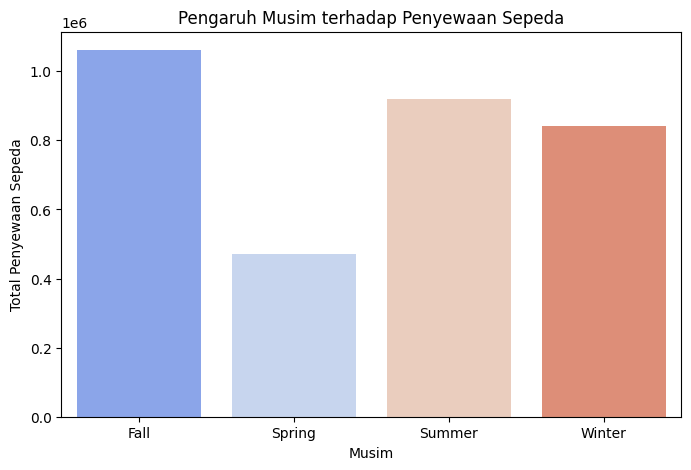

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="total_rentals", data=season_rentals, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Pengaruh Musim terhadap Penyewaan Sepeda")
plt.show()

**Insight**:
- Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) dengan total sekitar 1.06 juta penyewaan dan rata-rata 5.644 penyewaan per hari.
- Musim dengan penyewaan terendah adalah Spring (Musim Semi) dengan total sekitar 471 ribu penyewaan dan rata-rata 2.604 penyewaan per hari.
- Secara umum, penyewaan sepeda cenderung lebih tinggi pada musim panas (Summer) dan musim gugur (Fall) dibandingkan musim dingin (Winter) atau musim semi (Spring).
- Musim dingin masih memiliki jumlah penyewaan yang cukup tinggi, meskipun lebih rendah dibandingkan musim gugur dan musim panas.

### Pertanyaan 2:

<ipython-input-9-3055ca484487>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="total_rentals", data=weather_rentals, palette="viridis")


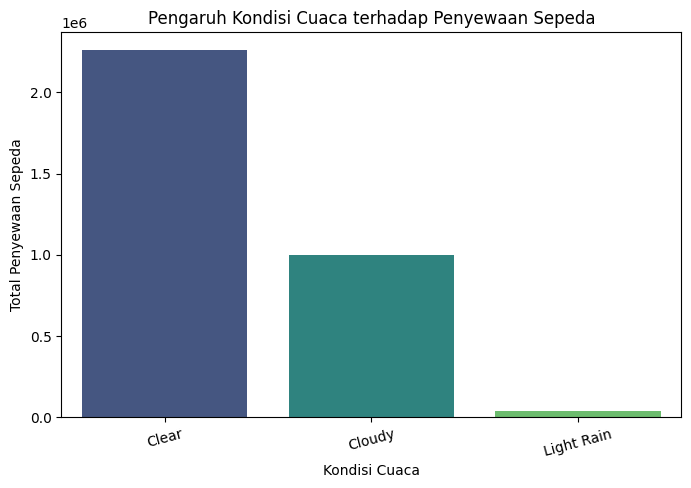

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x="weathersit", y="total_rentals", data=weather_rentals, palette="viridis")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xticks(rotation=15)
plt.show()

**Insight:**
- Kondisi cuaca cerah (Clear) memiliki jumlah penyewaan tertinggi, yaitu 2.26 juta penyewaan dengan rata-rata sekitar 4.876 penyewaan per hari.
- Penyewaan sepeda menurun pada cuaca mendung (Cloudy), dengan total 996 ribu penyewaan dan rata-rata 4.035 penyewaan per hari.
- Penyewaan sepeda sangat rendah pada kondisi hujan ringan (Light Rain), hanya 37.869 penyewaan secara total.
- Tidak ada data penyewaan untuk hujan lebat atau badai, yang mengindikasikan bahwa hampir tidak ada orang yang menyewa sepeda dalam kondisi cuaca ekstrem.

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim berpengaruh signifikan terhadap penyewaan sepeda. Strategi bisnis seperti promosi atau diskon bisa difokuskan pada musim dengan penyewaan lebih rendah (misalnya, musim semi) untuk meningkatkan penggunaan sepeda.
- Cuaca cerah adalah faktor yang sangat mendukung penggunaan sepeda. Penyedia layanan penyewaan sepeda dapat mempertimbangkan strategi seperti menawarkan diskon atau promosi pada hari mendung atau hujan ringan untuk meningkatkan jumlah pengguna.